<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371D Homework 2

By: Brian Du, Kenneth Marenco, and Zach Starr

### Problem 0 (3 points)

## Part 1: Miscellaneous Exam-Style Problems 

### Problem 1.1

a) The domain is the 10 bins of the histogram. 

$$
x = {x \mbox{  in   } N^{10} | \mbox{    sum across all values of    } i \mbox{    from   } 1-10 (x_i) = 400}
$$
The codomain is the list of all the labels of the apple or non-apple.{golden delicious, red delicious, Granny Smith, none}


b) The set of all Voronoi Diagrams such that each region tells you what class the data point is.



c) The zero-one loss function would work well in this case.

### Problem 1.2

$c_0$ would be $1$. 
$c_1$ would be $-1/2$. 
So for $y$, the value would be $-1/2$.

### Problem 1.3

a) There are 3 edges


b) $(1,1)$


c) $y = 1$, $y = -x + 2$, $x = 1$

### Problem 1.4

a) $(- \infty, 5)$


b) $(1, \infty)$

## Part 2: Nearest Neighbors 

In [1]:
import pickle

file_name = 'data.pkl'
with open(file_name, 'rb') as file:
    data = pickle.load(file)

T, S = data['training set'], data['test set']

In [2]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

def compare(T, S, ys_hat, risk, title, fig_size=(12, 4)):
    plt.figure(figsize=fig_size)
    plt.plot(T['x'], T['y'], c='green', marker='s', ms=12, label='training points')
    plt.plot(S['x'], S['y'], c='red', marker='o', label='test points')
    plt.plot(S['x'], ys_hat, c='blue', marker='x', label='estimated test values')
    plt.legend()
    plt.title('{}. Risk {:.6f}'.format(title, risk(S['y'], ys_hat)))
    plt.show()

In [3]:
def distance(x, xp):
    return np.abs(x - xp)


def loss(y, y_hat):
    return np.abs(y - y_hat)

### Problem 2.1

In [4]:
def nearest(x, X, k):
    a = np.zeros(len(X))
    for i in range(len(X)):
        a[i] = distance(x, X[i])
    index_arr = np.argsort(a)
    return index_arr[:k]


print(nearest(0.3, T['x'], 5))

[26 25 24 23 27]


### Problem 2.2

In [5]:
def knn(x, T, k):
    X = T['x']
    Y = T['y']
    sum = 0
    for index in nearest(x, X, k):
        sum += Y[index]
    return sum / k


print(knn(0.3, T, 5))

-0.1931753866608753


### Problem 2.3

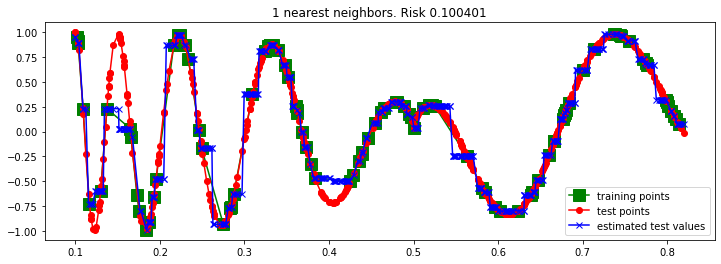

In [6]:
def risk(ys, ys_hat):
    risk = 0
    for i in range(len(ys)):
        risk += loss(ys[i], ys_hat[i])
    return risk / len(ys)

ys_hat = np.zeros(len(S['x'])) 
for i in range(len(S['x'])):
    ys_hat[i] = knn(S['x'][i], T, 1)
compare(T, S, ys_hat, risk, '{} nearest neighbors'.format(1))

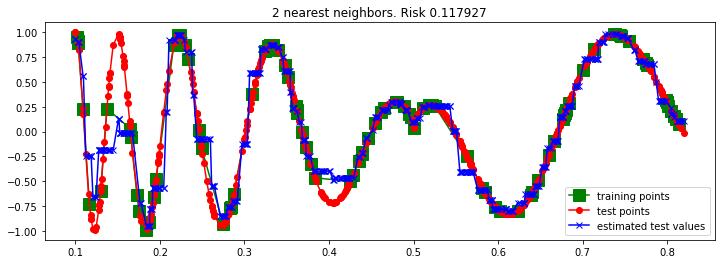

In [7]:
bys_hat = np.zeros(len(S['x'])) 
for i in range(len(S['x'])):
    bys_hat[i] = knn(S['x'][i], T, 2)
compare(T, S, bys_hat, risk, '{} nearest neighbors'.format(2))

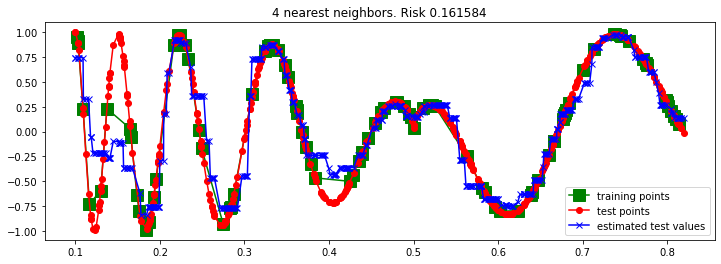

In [8]:
cys_hat = np.zeros(len(S['x'])) 
for i in range(len(S['x'])):
    cys_hat[i] = knn(S['x'][i], T, 4)
compare(T, S, cys_hat, risk, '{} nearest neighbors'.format(4))

### Problem 2.4

In [28]:
def polynomial(k):
    return lambda x: np.power(x, k)

def expand(x, max_x, coefficients, basis):
    return np.dot(evaluate_basis(x / max_x, basis, len(coefficients)), coefficients)

def evaluate_basis(x, basis, K):
    return np.array([basis(j)(x) for j in range(K)]).transpose()

def fit(xs, ys, K, basis, normalize=False):
    x = xs
    max_x = np.max(np.abs(x)) if normalize else 1.
    x /= max_x
    A = evaluate_basis(x, basis, K)
    b = ys
    return np.linalg.lstsq(A, b, rcond=None)[0], max_x



def infer_y(x, T, k, degree):
    X = T['x']
    Y = T['y']
    xs = np.zeros(len(T['x']))
    ys = np.zeros(len(T['x']))
    for index in nearest(x, X, k):
        xs[index] = X[index]
        ys[index] = Y[index]
        
    predictor_y = fit(xs, ys, degree, polynomial)
    return expand(xs, predictor_y[1], predictor_y[0], degree)




In [29]:
cys_hat = np.zeros(len(S['x'])) 
for i in range(len(S['x'])):
    cys_hat[i] = infer_y(S['x'][i], T, 2, 1)
compare(T, S, cys_hat, risk, '{} nearest neighbors'.format(2))

TypeError: 'int' object is not callable